# ❓ <font color='green'> <u> PROBLEM STATEMENT (Association Rule_Movie_Data) </u>

## 🔵 Prepare Association Rule for Movie Data set.

### 1) Try different values of support and confidence. Observe the change in number of rules for different support and confidence values.
### 2) Change the minimum length in apriori algorithm.
### 3) Visualize the obtained rules using different plots.

### <font color ='brown'> Here, We have to analyse the Association rules for Movies i.e. which of the following Movies viewers would like to watch one after another or viewers likeness of different themes. After analysing watchers pattern for theme of movies we will find association rules to build Marketing Strategies.

___

* ### <font color = 'blue'> <u> IMPORT NECESSARY LIBRARIES </u>

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as pe 
%matplotlib inline
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_theme(style='darkgrid', palette='rainbow')

* ### <font color = 'blue'> <u> READ DATA </u>

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/SwatiVPatil/Data_sets/main/my_movies.csv")
df

V1             V2             V3          V4     V5  \
0    Sixth Sense          LOTR1  Harry Potter1  Green Mile  LOTR2   
1      Gladiator        Patriot     Braveheart         NaN    NaN   
2          LOTR1          LOTR2            NaN         NaN    NaN   
3      Gladiator        Patriot    Sixth Sense         NaN    NaN   
4      Gladiator        Patriot    Sixth Sense         NaN    NaN   
5      Gladiator        Patriot    Sixth Sense         NaN    NaN   
6  Harry Potter1  Harry Potter2            NaN         NaN    NaN   
7      Gladiator        Patriot            NaN         NaN    NaN   
8      Gladiator        Patriot    Sixth Sense         NaN    NaN   
9    Sixth Sense           LOTR      Gladiator  Green Mile    NaN   

   Sixth Sense  Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  \
0            1          0      1              1        0      1   
1            0          1      0              0        1      0   
2            0          0      1              0        0      1   
3            1          1      0              0        1      0   
4            1          1      0              0        1      0   
5            1          1      0              0        1      0   
6            0          0      0              1        0      0   
7            0          1      0              0        1      0   
8            1          1      0              0        1      0   
9            1          1      0              0        0      0   

   Harry Potter2  LOTR  Braveheart  Green Mile  
0              0     0           0           1  
1              0     0           1           0  
2              0     0           0           0  
3              0     0           0           0  
4              0     0           0           0  
5              0     0           0           0  
6              1     0           0           0  
7              0     0           0           0  
8              0     0           0           0  
9              0     1           0           1

* ##### <font color ='green'> <u>Let's select useful dimensions </u>

In [3]:
df = df.iloc[:,5:]
df

Sixth Sense  Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  \
0            1          0      1              1        0      1   
1            0          1      0              0        1      0   
2            0          0      1              0        0      1   
3            1          1      0              0        1      0   
4            1          1      0              0        1      0   
5            1          1      0              0        1      0   
6            0          0      0              1        0      0   
7            0          1      0              0        1      0   
8            1          1      0              0        1      0   
9            1          1      0              0        0      0   

   Harry Potter2  LOTR  Braveheart  Green Mile  
0              0     0           0           1  
1              0     0           1           0  
2              0     0           0           0  
3              0     0           0           0  
4              0     0           0           0  
5              0     0           0           0  
6              1     0           0           0  
7              0     0           0           0  
8              0     0           0           0  
9              0     1           0           1

___

* ### <font color = 'blue'> <u> PERFORM EDA </u>

* ##### <font color ='green'> <u>Data Summary</u>

In [4]:
df.shape

(10, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


> * #### This is small data set in all 9 Movies with only 10 user data who watched the particular movie.
> * #### All the Data is in Binary form as 1 for "movie watched" and 0 for "not watched movie ". 
> * #### Data type for all books are correct.

___

* ##### <font color ='green'> <u>Descriptive statistics</u>

In [6]:
# Frequency for Movie Watched :

movie = df.loc[:,:].sum()
movie

Sixth Sense      6
Gladiator        7
LOTR1            2
Harry Potter1    2
Patriot          6
LOTR2            2
Harry Potter2    1
LOTR             1
Braveheart       1
Green Mile       2
dtype: int64

In [7]:
# Checking For null Value if any:

df.isna().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

> * #### "Gladiator" Movie watched majorly among the data.
> * #### There no null value present.

___

* ### <font color = 'blue'> <u> DATA VISUALISATION </u>

* ##### <font color ='green'><u> Countplot For Movies watched </u>

In [8]:
movie.sort_values(0, ascending = False, inplace=True)
movie = pd.DataFrame(movie).reset_index()
movie.rename(columns = {'index':'Movie', 0:'Count'}, inplace= True)

Text(0.5, 1.0, 'Count of Movies Watched')

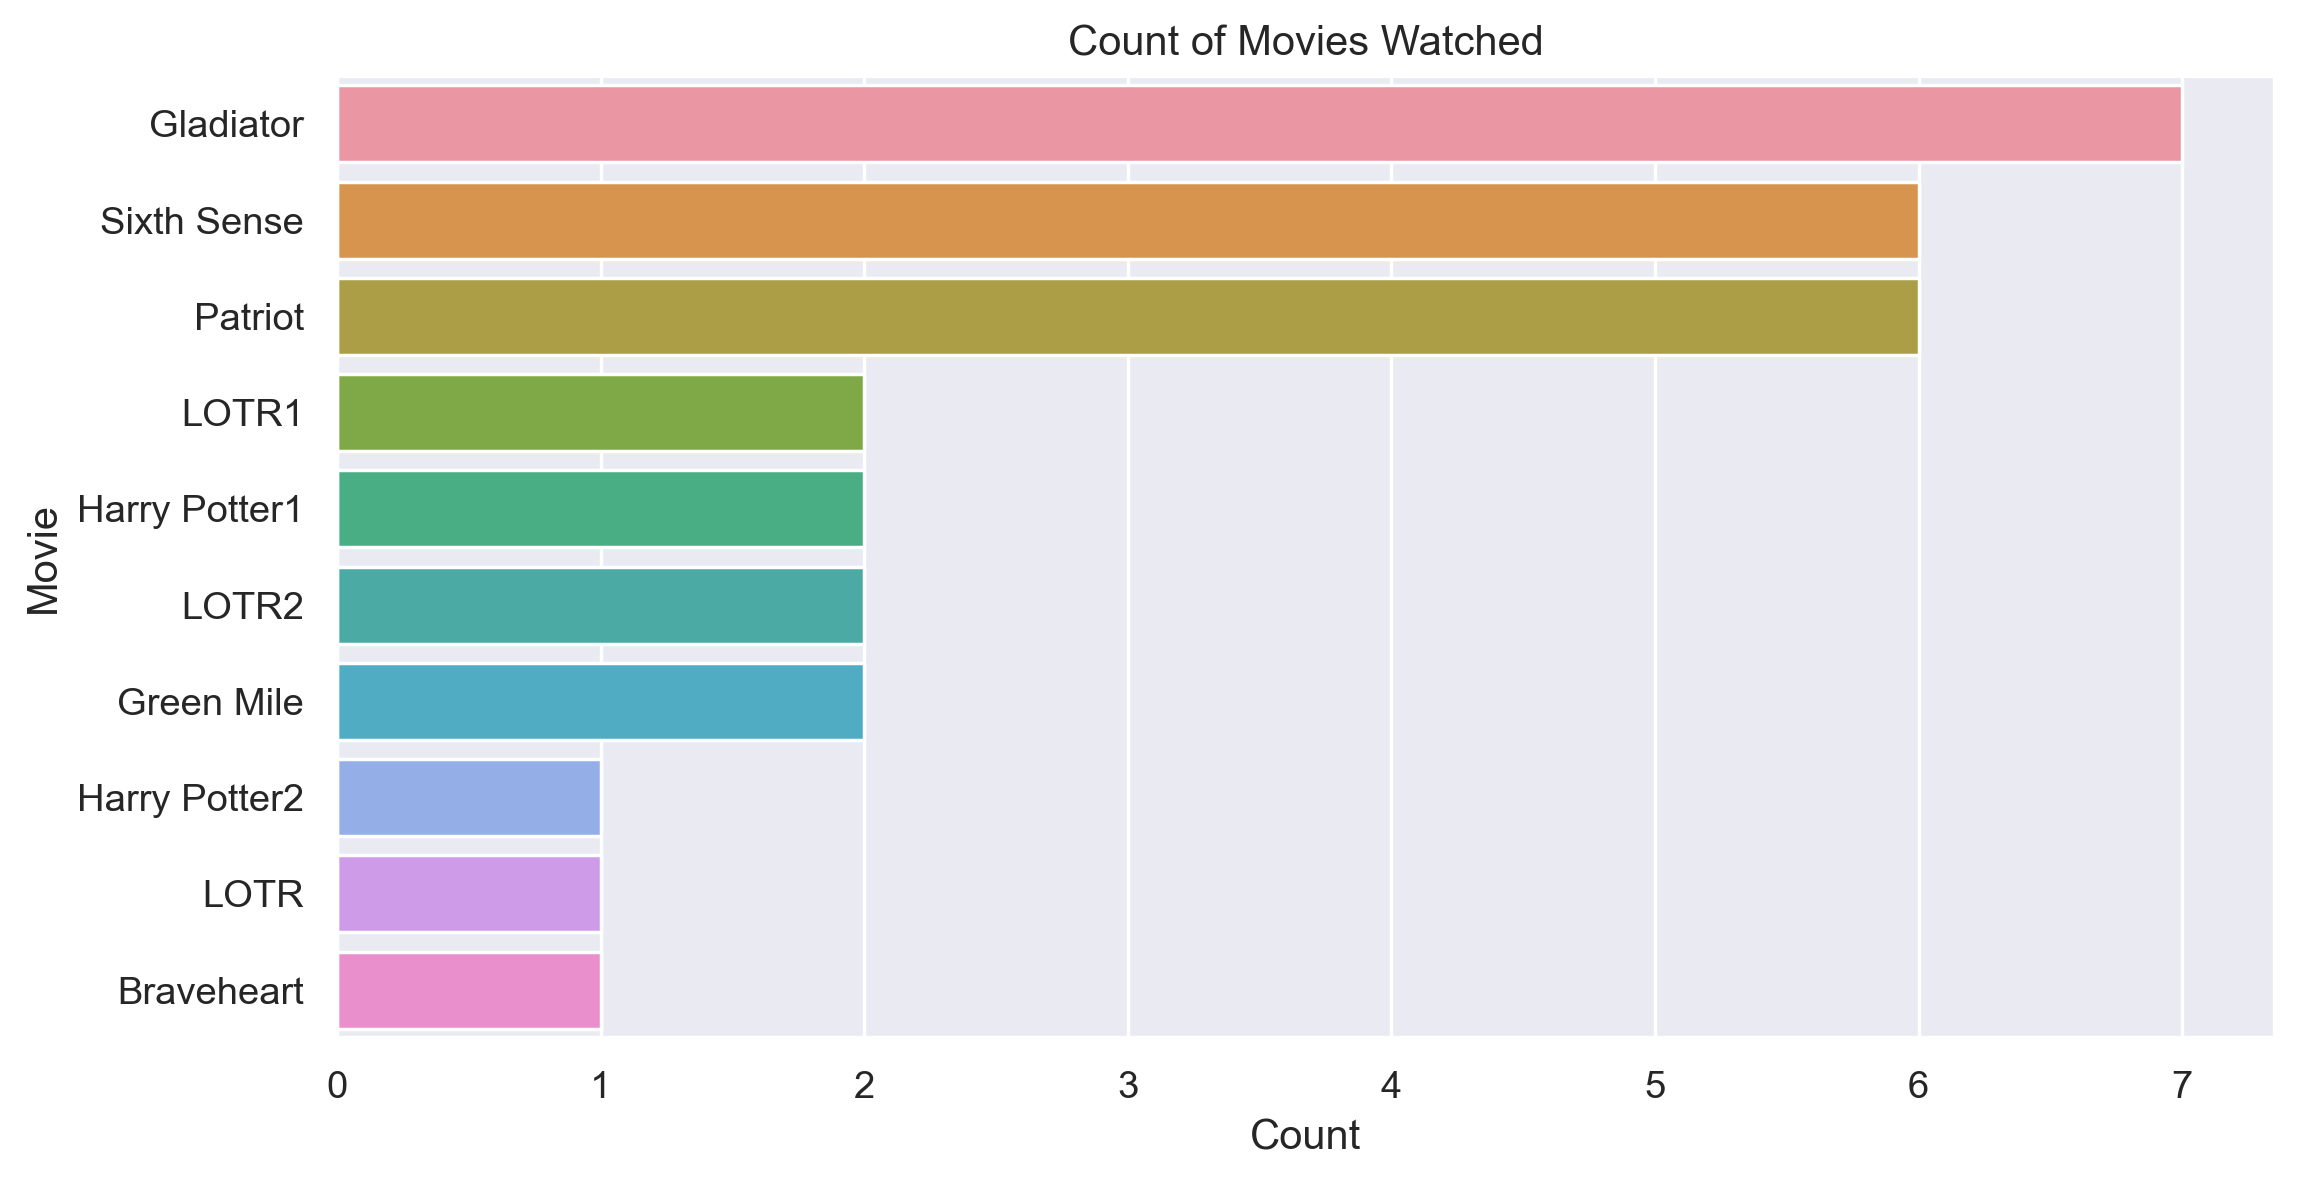

In [9]:
sns.barplot(x = 'Count', y = 'Movie', data = movie)
plt.title('Count of Movies Watched')

---

* ### <font color = 'blue'> <u> MODEL BUILDING - APRIORI ALGORITHM</u>

#### 1. Support is an indication of how frequently the itemset appears in the dataset. (Support Range: 0 to 1)
#### 2. Confidence is the percentage of all transactions satisfying X that also satisfy Y. (Confidence Range: 0 to 1)
#### 3. Lift is the ratio of the observed support to that expected if X and Y were independent.
 * Lift ratio greater than 1 is good association rule.
 * If the frequency of Antecedent is high then we got high level of confidence this mislead actual association rule so we rely on lift ratio.
#### 4. Leverage value close to +1 indicates X and Y are highly associated. Zero indicates independence.
#### 5. Conviction ratio more than 1 is considered as good association rule.

___

### <font color = 'green'> 1. ASSOCIATION RULE FOR 50% SUPPORT VALUE AND 80% CONFIDENCE 

In [10]:
score_1 = apriori(df, min_support = 0.5, use_colnames = True)
score_1

support                  itemsets
0      0.6             (Sixth Sense)
1      0.7               (Gladiator)
2      0.6                 (Patriot)
3      0.5  (Gladiator, Sixth Sense)
4      0.6      (Patriot, Gladiator)

In [11]:
model_1 = association_rules(score_1, metric = 'confidence', min_threshold = 0.8)
model_1

antecedents  consequents  antecedent support  consequent support  \
0  (Sixth Sense)  (Gladiator)                 0.6                 0.7   
1      (Patriot)  (Gladiator)                 0.6                 0.7   
2    (Gladiator)    (Patriot)                 0.7                 0.6   

   support  confidence      lift  leverage  conviction  zhangs_metric  
0      0.5    0.833333  1.190476      0.08         1.8           0.40  
1      0.6    1.000000  1.428571      0.18         inf           0.75  
2      0.6    0.857143  1.428571      0.18         2.8           1.00

* #### <font color ='red'><span style='background:yellow'> VISUALISATION: SCATTER PLOT </span>

In [12]:
pe.scatter_3d(data_frame= model_1, x = 'confidence', y = 'support', z = 'lift')

* #### <font color ='red'><span style='background:yellow'> VISUALISATION: HEATMAP </span>

In [13]:
matrix_1 = model_1.pivot('antecedents','consequents','lift')
matrix_1

consequents    (Gladiator)  (Patriot)
antecedents                          
(Sixth Sense)     1.190476        NaN
(Patriot)         1.428571        NaN
(Gladiator)            NaN   1.428571

Text(0.5, 1.0, 'Lift Ratios For 50% Support and 80% Confidence')

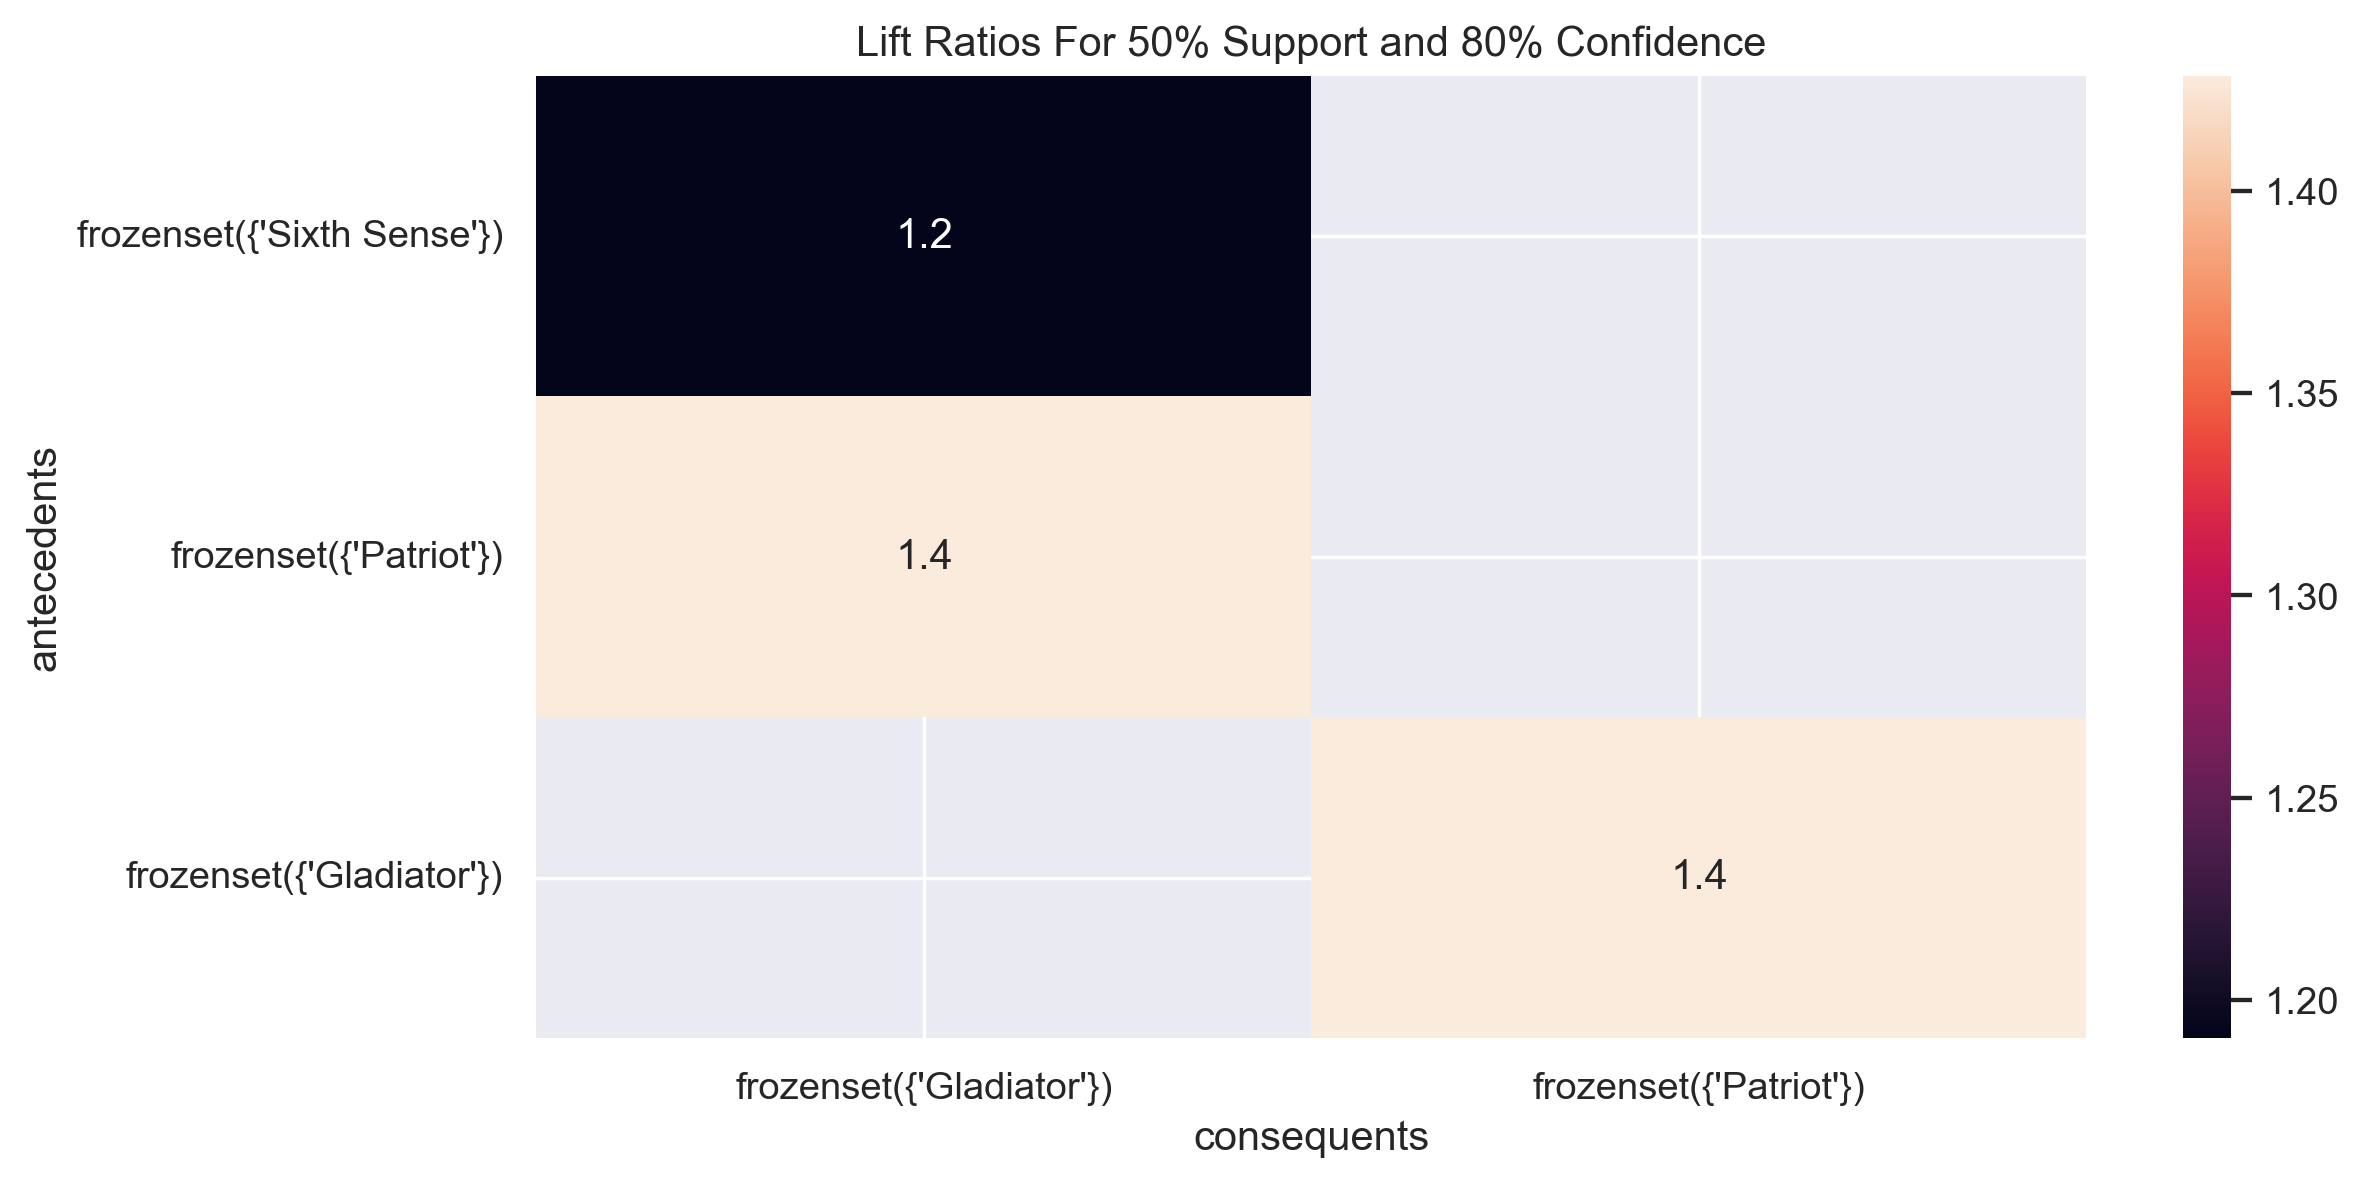

In [14]:
sns.heatmap(matrix_1,annot=True)
plt.title('Lift Ratios For 50% Support and 80% Confidence')

> * #### With 50% Support and 80% Confidence we get just 2 combination of movies (Gladiator)-(Patriot) and (Sixth Sense)-(Gladiator) with lift value greater than 1 and also more than 1 conviction rate, which shows good association.
> * #### Let's reduce support and confidence value to get more association rules.

___

### <font color = 'green'> 2. ASSOCIATION RULE FOR 40% SUPPORT VALUE AND 60% CONFIDENCE 

In [15]:
score_2 = apriori(df, min_support = 0.4, use_colnames = True)
score_2

support                           itemsets
0      0.6                      (Sixth Sense)
1      0.7                        (Gladiator)
2      0.6                          (Patriot)
3      0.5           (Gladiator, Sixth Sense)
4      0.4             (Patriot, Sixth Sense)
5      0.6               (Patriot, Gladiator)
6      0.4  (Patriot, Gladiator, Sixth Sense)

In [16]:
model_2 = association_rules(score_2, metric = 'confidence', min_threshold = 0.6)
model_2

antecedents               consequents  antecedent support  \
0                (Gladiator)             (Sixth Sense)                 0.7   
1              (Sixth Sense)               (Gladiator)                 0.6   
2                  (Patriot)             (Sixth Sense)                 0.6   
3              (Sixth Sense)                 (Patriot)                 0.6   
4                  (Patriot)               (Gladiator)                 0.6   
5                (Gladiator)                 (Patriot)                 0.7   
6       (Patriot, Gladiator)             (Sixth Sense)                 0.6   
7     (Patriot, Sixth Sense)               (Gladiator)                 0.4   
8   (Gladiator, Sixth Sense)                 (Patriot)                 0.5   
9                  (Patriot)  (Gladiator, Sixth Sense)                 0.6   
10             (Sixth Sense)      (Patriot, Gladiator)                 0.6   

    consequent support  support  confidence      lift  leverage  conviction  \
0                  0.6      0.5    0.714286  1.190476      0.08         1.4   
1                  0.7      0.5    0.833333  1.190476      0.08         1.8   
2                  0.6      0.4    0.666667  1.111111      0.04         1.2   
3                  0.6      0.4    0.666667  1.111111      0.04         1.2   
4                  0.7      0.6    1.000000  1.428571      0.18         inf   
5                  0.6      0.6    0.857143  1.428571      0.18         2.8   
6                  0.6      0.4    0.666667  1.111111      0.04         1.2   
7                  0.7      0.4    1.000000  1.428571      0.12         inf   
8                  0.6      0.4    0.800000  1.333333      0.10         2.0   
9                  0.5      0.4    0.666667  1.333333      0.10         1.5   
10                 0.6      0.4    0.666667  1.111111      0.04         1.2   

    zhangs_metric  
0        0.533333  
1        0.400000  
2        0.250000  
3        0.250000  
4        0.750000  
5        1.000000  
6        0.250000  
7        0.500000  
8        0.500000  
9        0.625000  
10       0.250000

* #### <font color ='red'><span style='background:yellow'> VISUALISATION: SCATTER PLOT </span>

In [17]:
pe.scatter_3d(data_frame= model_2, x = 'confidence', y = 'support', z = 'lift')

* #### <font color ='red'><span style='background:yellow'> VISUALISATION: HEATMAP </span>

Text(0.5, 1.0, 'Lift Ratios For 40% Support and 60% Confidence')

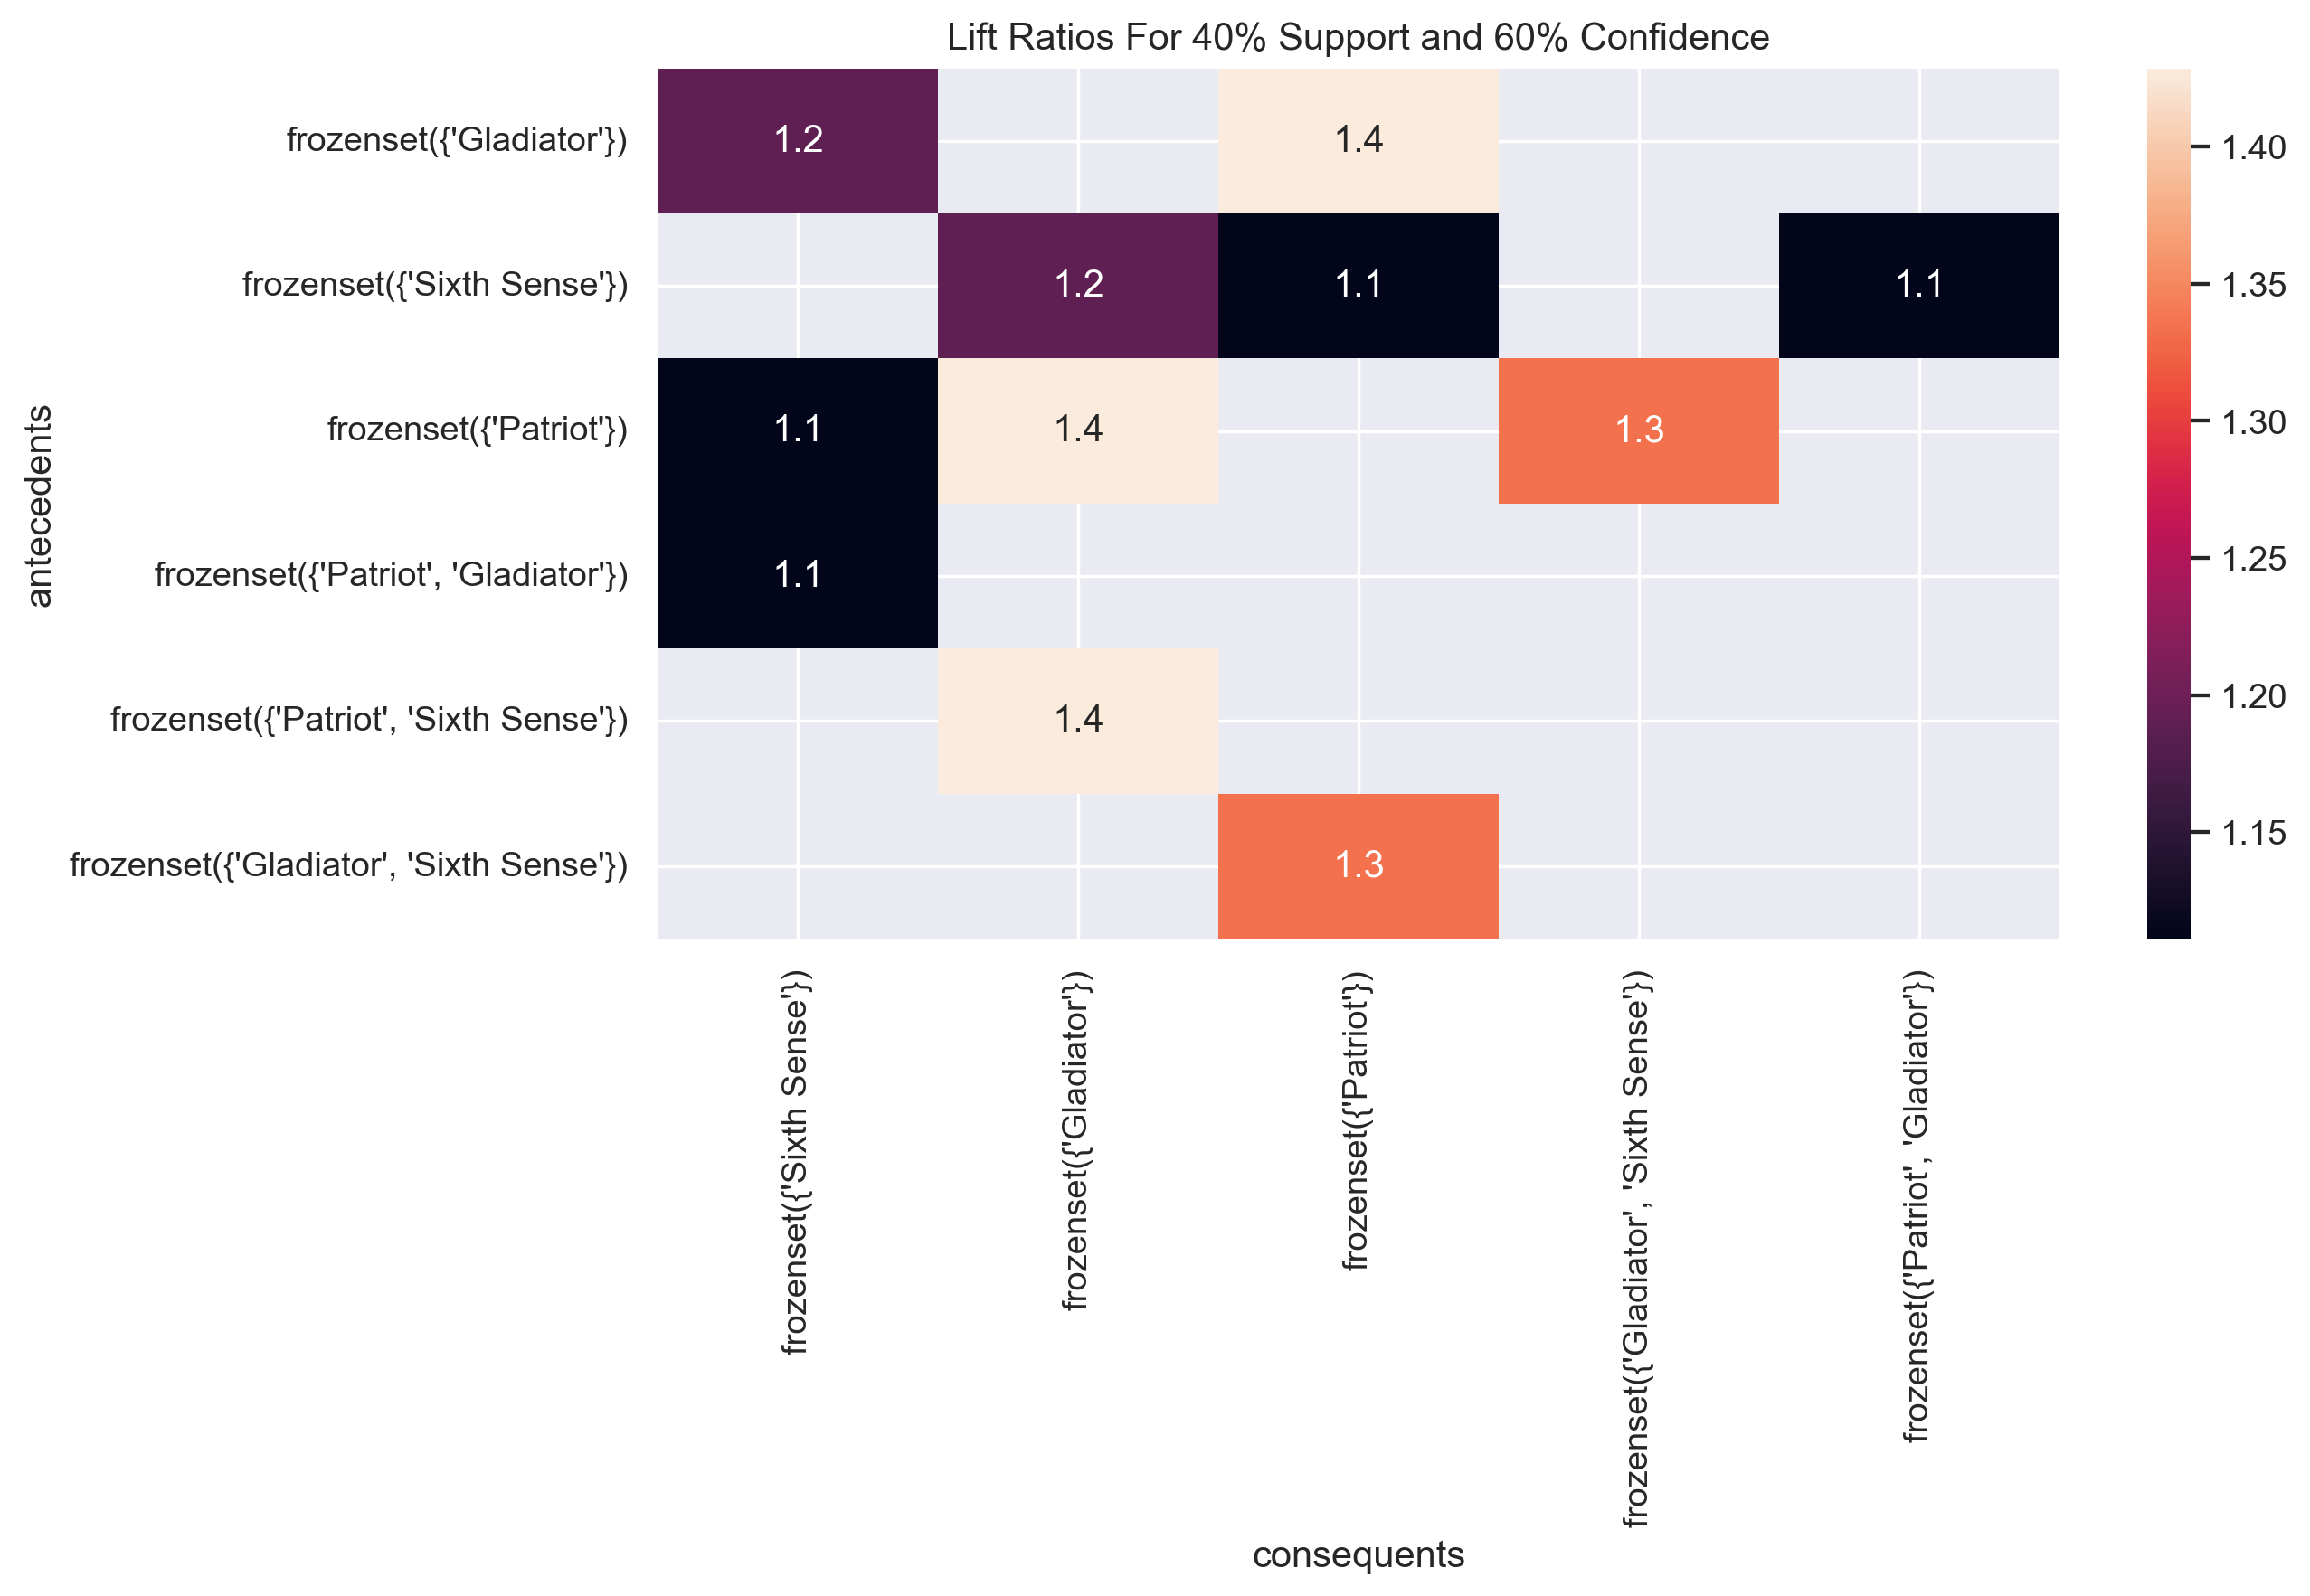

In [18]:
matrix_2 = model_2.pivot('antecedents','consequents','lift')
sns.heatmap(matrix_2,annot=True)
plt.title('Lift Ratios For 40% Support and 60% Confidence')

> * #### After reducing the support and confidence value to 40% and 60% respectively, we get 11 combinations. With all having greater than 1 lift ratio.
> * #### Also we length of association is increased to 3.
> * #### (Patriot)-(Gladiator) and 	(Patriot, Sixth Sense)-(Gladiator) association rules have confidence value 1 and conviction ratio infinity which is sign of good association rule.

____

### <font color = 'green'> 3. ASSOCIATION RULE FOR 20% SUPPORT VALUE AND 40% CONFIDENCE 

In [19]:
score_3 = apriori(df, min_support = 0.2, use_colnames = True)
score_3

support                           itemsets
0       0.6                      (Sixth Sense)
1       0.7                        (Gladiator)
2       0.2                            (LOTR1)
3       0.2                    (Harry Potter1)
4       0.6                          (Patriot)
5       0.2                            (LOTR2)
6       0.2                       (Green Mile)
7       0.5           (Gladiator, Sixth Sense)
8       0.4             (Patriot, Sixth Sense)
9       0.2          (Green Mile, Sixth Sense)
10      0.6               (Patriot, Gladiator)
11      0.2                     (LOTR2, LOTR1)
12      0.4  (Patriot, Gladiator, Sixth Sense)

In [20]:
model_3 = association_rules(score_3, metric = 'confidence', min_threshold = 0.4)
model_3

antecedents               consequents  antecedent support  \
0                (Gladiator)             (Sixth Sense)                 0.7   
1              (Sixth Sense)               (Gladiator)                 0.6   
2                  (Patriot)             (Sixth Sense)                 0.6   
3              (Sixth Sense)                 (Patriot)                 0.6   
4               (Green Mile)             (Sixth Sense)                 0.2   
5                  (Patriot)               (Gladiator)                 0.6   
6                (Gladiator)                 (Patriot)                 0.7   
7                    (LOTR2)                   (LOTR1)                 0.2   
8                    (LOTR1)                   (LOTR2)                 0.2   
9       (Patriot, Gladiator)             (Sixth Sense)                 0.6   
10    (Patriot, Sixth Sense)               (Gladiator)                 0.4   
11  (Gladiator, Sixth Sense)                 (Patriot)                 0.5   
12                 (Patriot)  (Gladiator, Sixth Sense)                 0.6   
13               (Gladiator)    (Patriot, Sixth Sense)                 0.7   
14             (Sixth Sense)      (Patriot, Gladiator)                 0.6   

    consequent support  support  confidence      lift  leverage  conviction  \
0                  0.6      0.5    0.714286  1.190476      0.08         1.4   
1                  0.7      0.5    0.833333  1.190476      0.08         1.8   
2                  0.6      0.4    0.666667  1.111111      0.04         1.2   
3                  0.6      0.4    0.666667  1.111111      0.04         1.2   
4                  0.6      0.2    1.000000  1.666667      0.08         inf   
5                  0.7      0.6    1.000000  1.428571      0.18         inf   
6                  0.6      0.6    0.857143  1.428571      0.18         2.8   
7                  0.2      0.2    1.000000  5.000000      0.16         inf   
8                  0.2      0.2    1.000000  5.000000      0.16         inf   
9                  0.6      0.4    0.666667  1.111111      0.04         1.2   
10                 0.7      0.4    1.000000  1.428571      0.12         inf   
11                 0.6      0.4    0.800000  1.333333      0.10         2.0   
12                 0.5      0.4    0.666667  1.333333      0.10         1.5   
13                 0.4      0.4    0.571429  1.428571      0.12         1.4   
14                 0.6      0.4    0.666667  1.111111      0.04         1.2   

    zhangs_metric  
0        0.533333  
1        0.400000  
2        0.250000  
3        0.250000  
4        0.500000  
5        0.750000  
6        1.000000  
7        1.000000  
8        1.000000  
9        0.250000  
10       0.500000  
11       0.500000  
12       0.625000  
13       1.000000  
14       0.250000

* #### <font color ='red'><span style='background:yellow'> VISUALISATION: SCATTER PLOT </span>

In [21]:
pe.scatter_3d(data_frame= model_3, x = 'confidence', y = 'support', z = 'lift')

* #### <font color ='red'><span style='background:yellow'> VISUALISATION: HEATMAP </span>

Text(0.5, 1.0, 'Lift Ratios For 20% Support and 40% Confidence')

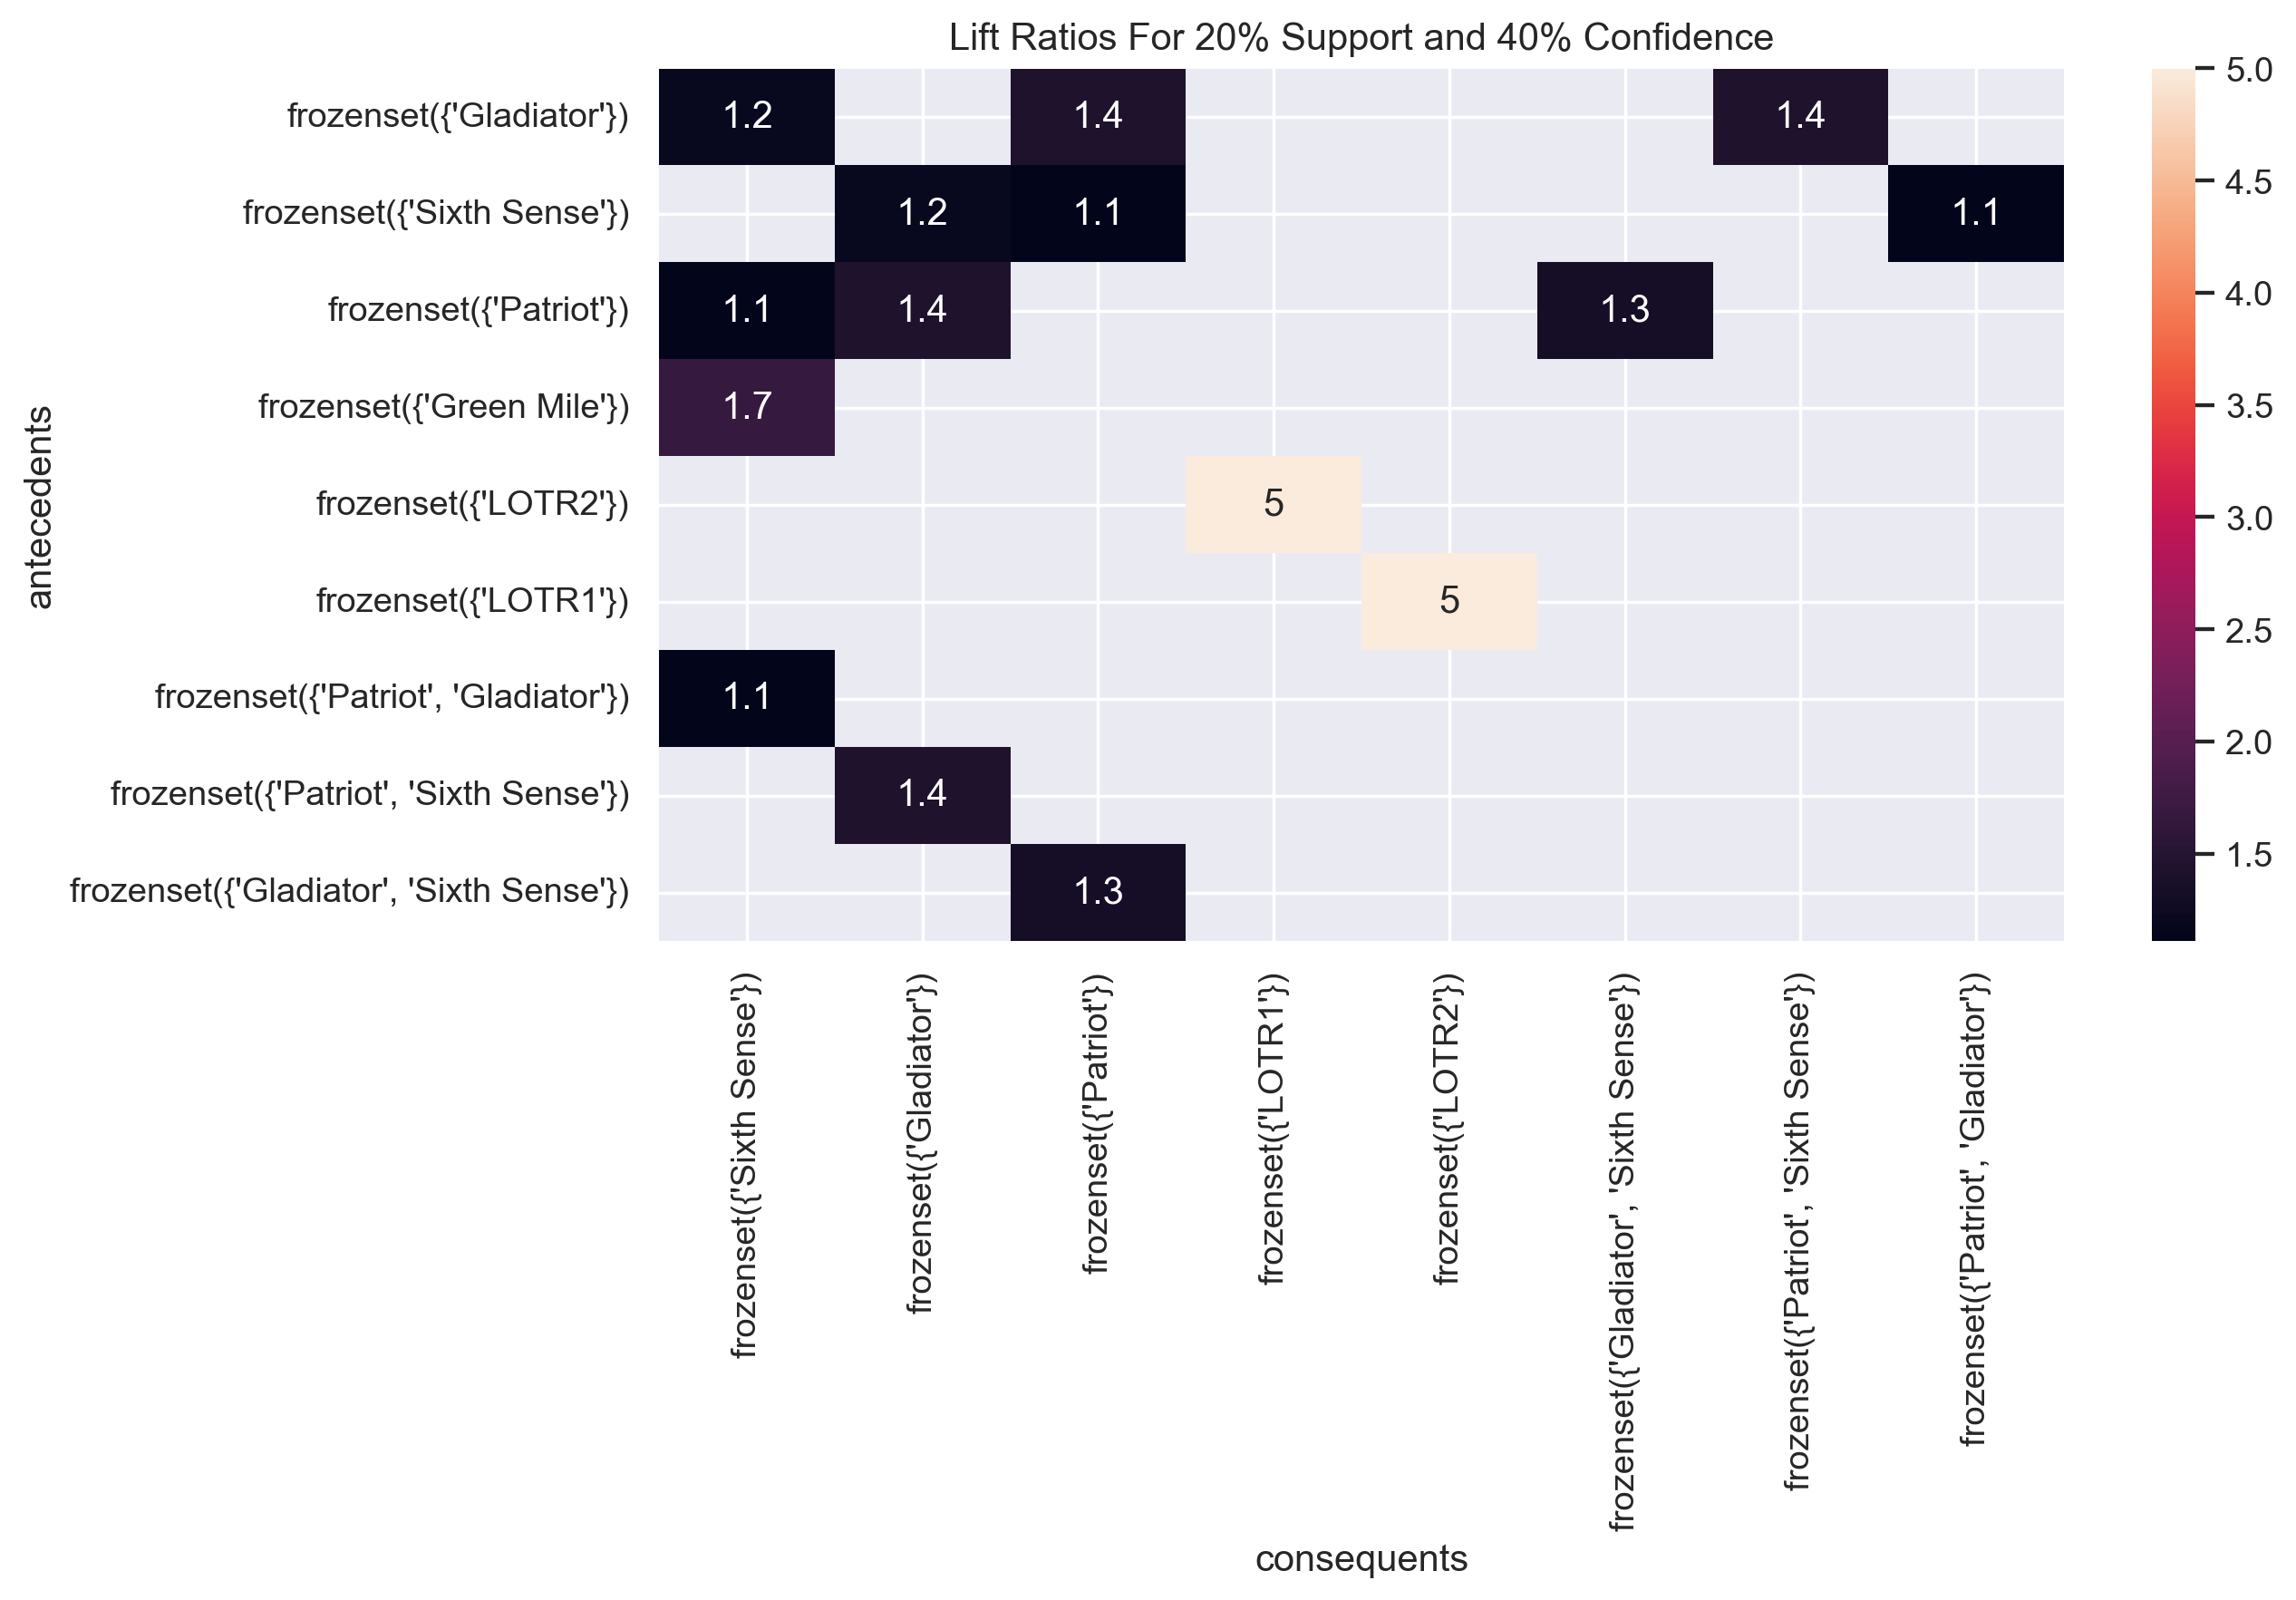

In [22]:
matrix_3 = model_3.pivot('antecedents','consequents','lift')
sns.heatmap(matrix_3,annot=True)
plt.title('Lift Ratios For 20% Support and 40% Confidence')

> * #### Again after reducing the support and confidence values we got 15 associations with increased length of associations.
> * #### All have more than 1 lift ratio and many more have conviction ratio infinity
> * #### Confidence value for 5 associations is 1.

____

### <font color = 'green'> 4. ASSOCIATION RULE FOR 10% SUPPORT VALUE AND 30% CONFIDENCE 

In [23]:
score_4 = apriori(df, min_support = 0.1, use_colnames = True)
score_4

support                                           itemsets
0       0.6                                      (Sixth Sense)
1       0.7                                        (Gladiator)
2       0.2                                            (LOTR1)
3       0.2                                    (Harry Potter1)
4       0.6                                          (Patriot)
5       0.2                                            (LOTR2)
6       0.1                                    (Harry Potter2)
7       0.1                                             (LOTR)
8       0.1                                       (Braveheart)
9       0.2                                       (Green Mile)
10      0.5                           (Gladiator, Sixth Sense)
11      0.1                               (Sixth Sense, LOTR1)
12      0.1                       (Harry Potter1, Sixth Sense)
13      0.4                             (Patriot, Sixth Sense)
14      0.1                               (LOTR2, Sixth Sense)
15      0.1                                (Sixth Sense, LOTR)
16      0.2                          (Green Mile, Sixth Sense)
17      0.6                               (Patriot, Gladiator)
18      0.1                                  (Gladiator, LOTR)
19      0.1                            (Gladiator, Braveheart)
20      0.1                            (Gladiator, Green Mile)
21      0.1                             (Harry Potter1, LOTR1)
22      0.2                                     (LOTR2, LOTR1)
23      0.1                                (Green Mile, LOTR1)
24      0.1                             (LOTR2, Harry Potter1)
25      0.1                     (Harry Potter1, Harry Potter2)
26      0.1                        (Harry Potter1, Green Mile)
27      0.1                              (Patriot, Braveheart)
28      0.1                                (LOTR2, Green Mile)
29      0.1                                 (Green Mile, LOTR)
30      0.4                  (Patriot, Gladiator, Sixth Sense)
31      0.1                     (Gladiator, Sixth Sense, LOTR)
32      0.1               (Gladiator, Green Mile, Sixth Sense)
33      0.1                (Harry Potter1, Sixth Sense, LOTR1)
34      0.1                        (LOTR2, Sixth Sense, LOTR1)
35      0.1                   (Green Mile, Sixth Sense, LOTR1)
36      0.1                (LOTR2, Harry Potter1, Sixth Sense)
37      0.1           (Harry Potter1, Green Mile, Sixth Sense)
38      0.1                   (LOTR2, Green Mile, Sixth Sense)
39      0.1                    (Green Mile, Sixth Sense, LOTR)
40      0.1                   (Patriot, Gladiator, Braveheart)
41      0.1                      (Gladiator, Green Mile, LOTR)
42      0.1                      (LOTR2, Harry Potter1, LOTR1)
43      0.1                 (Harry Potter1, Green Mile, LOTR1)
44      0.1                         (LOTR2, Green Mile, LOTR1)
45      0.1                 (LOTR2, Harry Potter1, Green Mile)
46      0.1         (Gladiator, Green Mile, Sixth Sense, LOTR)
47      0.1         (LOTR2, Harry Potter1, Sixth Sense, LOTR1)
48      0.1    (Harry Potter1, Green Mile, Sixth Sense, LOTR1)
49      0.1            (LOTR2, Green Mile, Sixth Sense, LOTR1)
50      0.1    (LOTR2, Harry Potter1, Green Mile, Sixth Sense)
51      0.1          (LOTR2, Harry Potter1, Green Mile, LOTR1)
52      0.1  (Green Mile, Sixth Sense, Harry Potter1, LOTR2...

In [24]:
model_4 = association_rules(score_4, metric = 'confidence', min_threshold = 0.3)
model_4

antecedents                                      consequents  \
0        (Gladiator)                                    (Sixth Sense)   
1      (Sixth Sense)                                      (Gladiator)   
2            (LOTR1)                                    (Sixth Sense)   
3    (Harry Potter1)                                    (Sixth Sense)   
4          (Patriot)                                    (Sixth Sense)   
..               ...                                              ...   
212   (LOTR2, LOTR1)         (Harry Potter1, Green Mile, Sixth Sense)   
213     (Green Mile)       (LOTR2, Harry Potter1, Sixth Sense, LOTR1)   
214  (Harry Potter1)          (LOTR2, Green Mile, Sixth Sense, LOTR1)   
215          (LOTR2)  (Harry Potter1, Green Mile, Sixth Sense, LOTR1)   
216          (LOTR1)  (LOTR2, Harry Potter1, Green Mile, Sixth Sense)   

     antecedent support  consequent support  support  confidence      lift  \
0                   0.7                 0.6      0.5    0.714286  1.190476   
1                   0.6                 0.7      0.5    0.833333  1.190476   
2                   0.2                 0.6      0.1    0.500000  0.833333   
3                   0.2                 0.6      0.1    0.500000  0.833333   
4                   0.6                 0.6      0.4    0.666667  1.111111   
..                  ...                 ...      ...         ...       ...   
212                 0.2                 0.1      0.1    0.500000  5.000000   
213                 0.2                 0.1      0.1    0.500000  5.000000   
214                 0.2                 0.1      0.1    0.500000  5.000000   
215                 0.2                 0.1      0.1    0.500000  5.000000   
216                 0.2                 0.1      0.1    0.500000  5.000000   

     leverage  conviction  zhangs_metric  
0        0.08         1.4       0.533333  
1        0.08         1.8       0.400000  
2       -0.02         0.8      -0.200000  
3       -0.02         0.8      -0.200000  
4        0.04         1.2       0.250000  
..        ...         ...            ...  
212      0.08         1.8       1.000000  
213      0.08         1.8       1.000000  
214      0.08         1.8       1.000000  
215      0.08         1.8       1.000000  
216      0.08         1.8       1.000000  

[217 rows x 10 columns]

In [25]:
model_4[model_4['lift'] == 10].count()

antecedents           42
consequents           42
antecedent support    42
consequent support    42
support               42
confidence            42
lift                  42
leverage              42
conviction            42
zhangs_metric         42
dtype: int64

* #### <font color ='red'><span style='background:yellow'> VISUALISATION: SCATTER PLOT </span>

In [26]:
pe.scatter_3d(data_frame= model_4, x = 'confidence', y = 'support', z = 'lift')

* #### <font color ='red'><span style='background:yellow'> VISUALISATION: HEATMAP </span>

Text(0.5, 1.0, 'Lift Ratios For 10% Support and 30% Confidence')

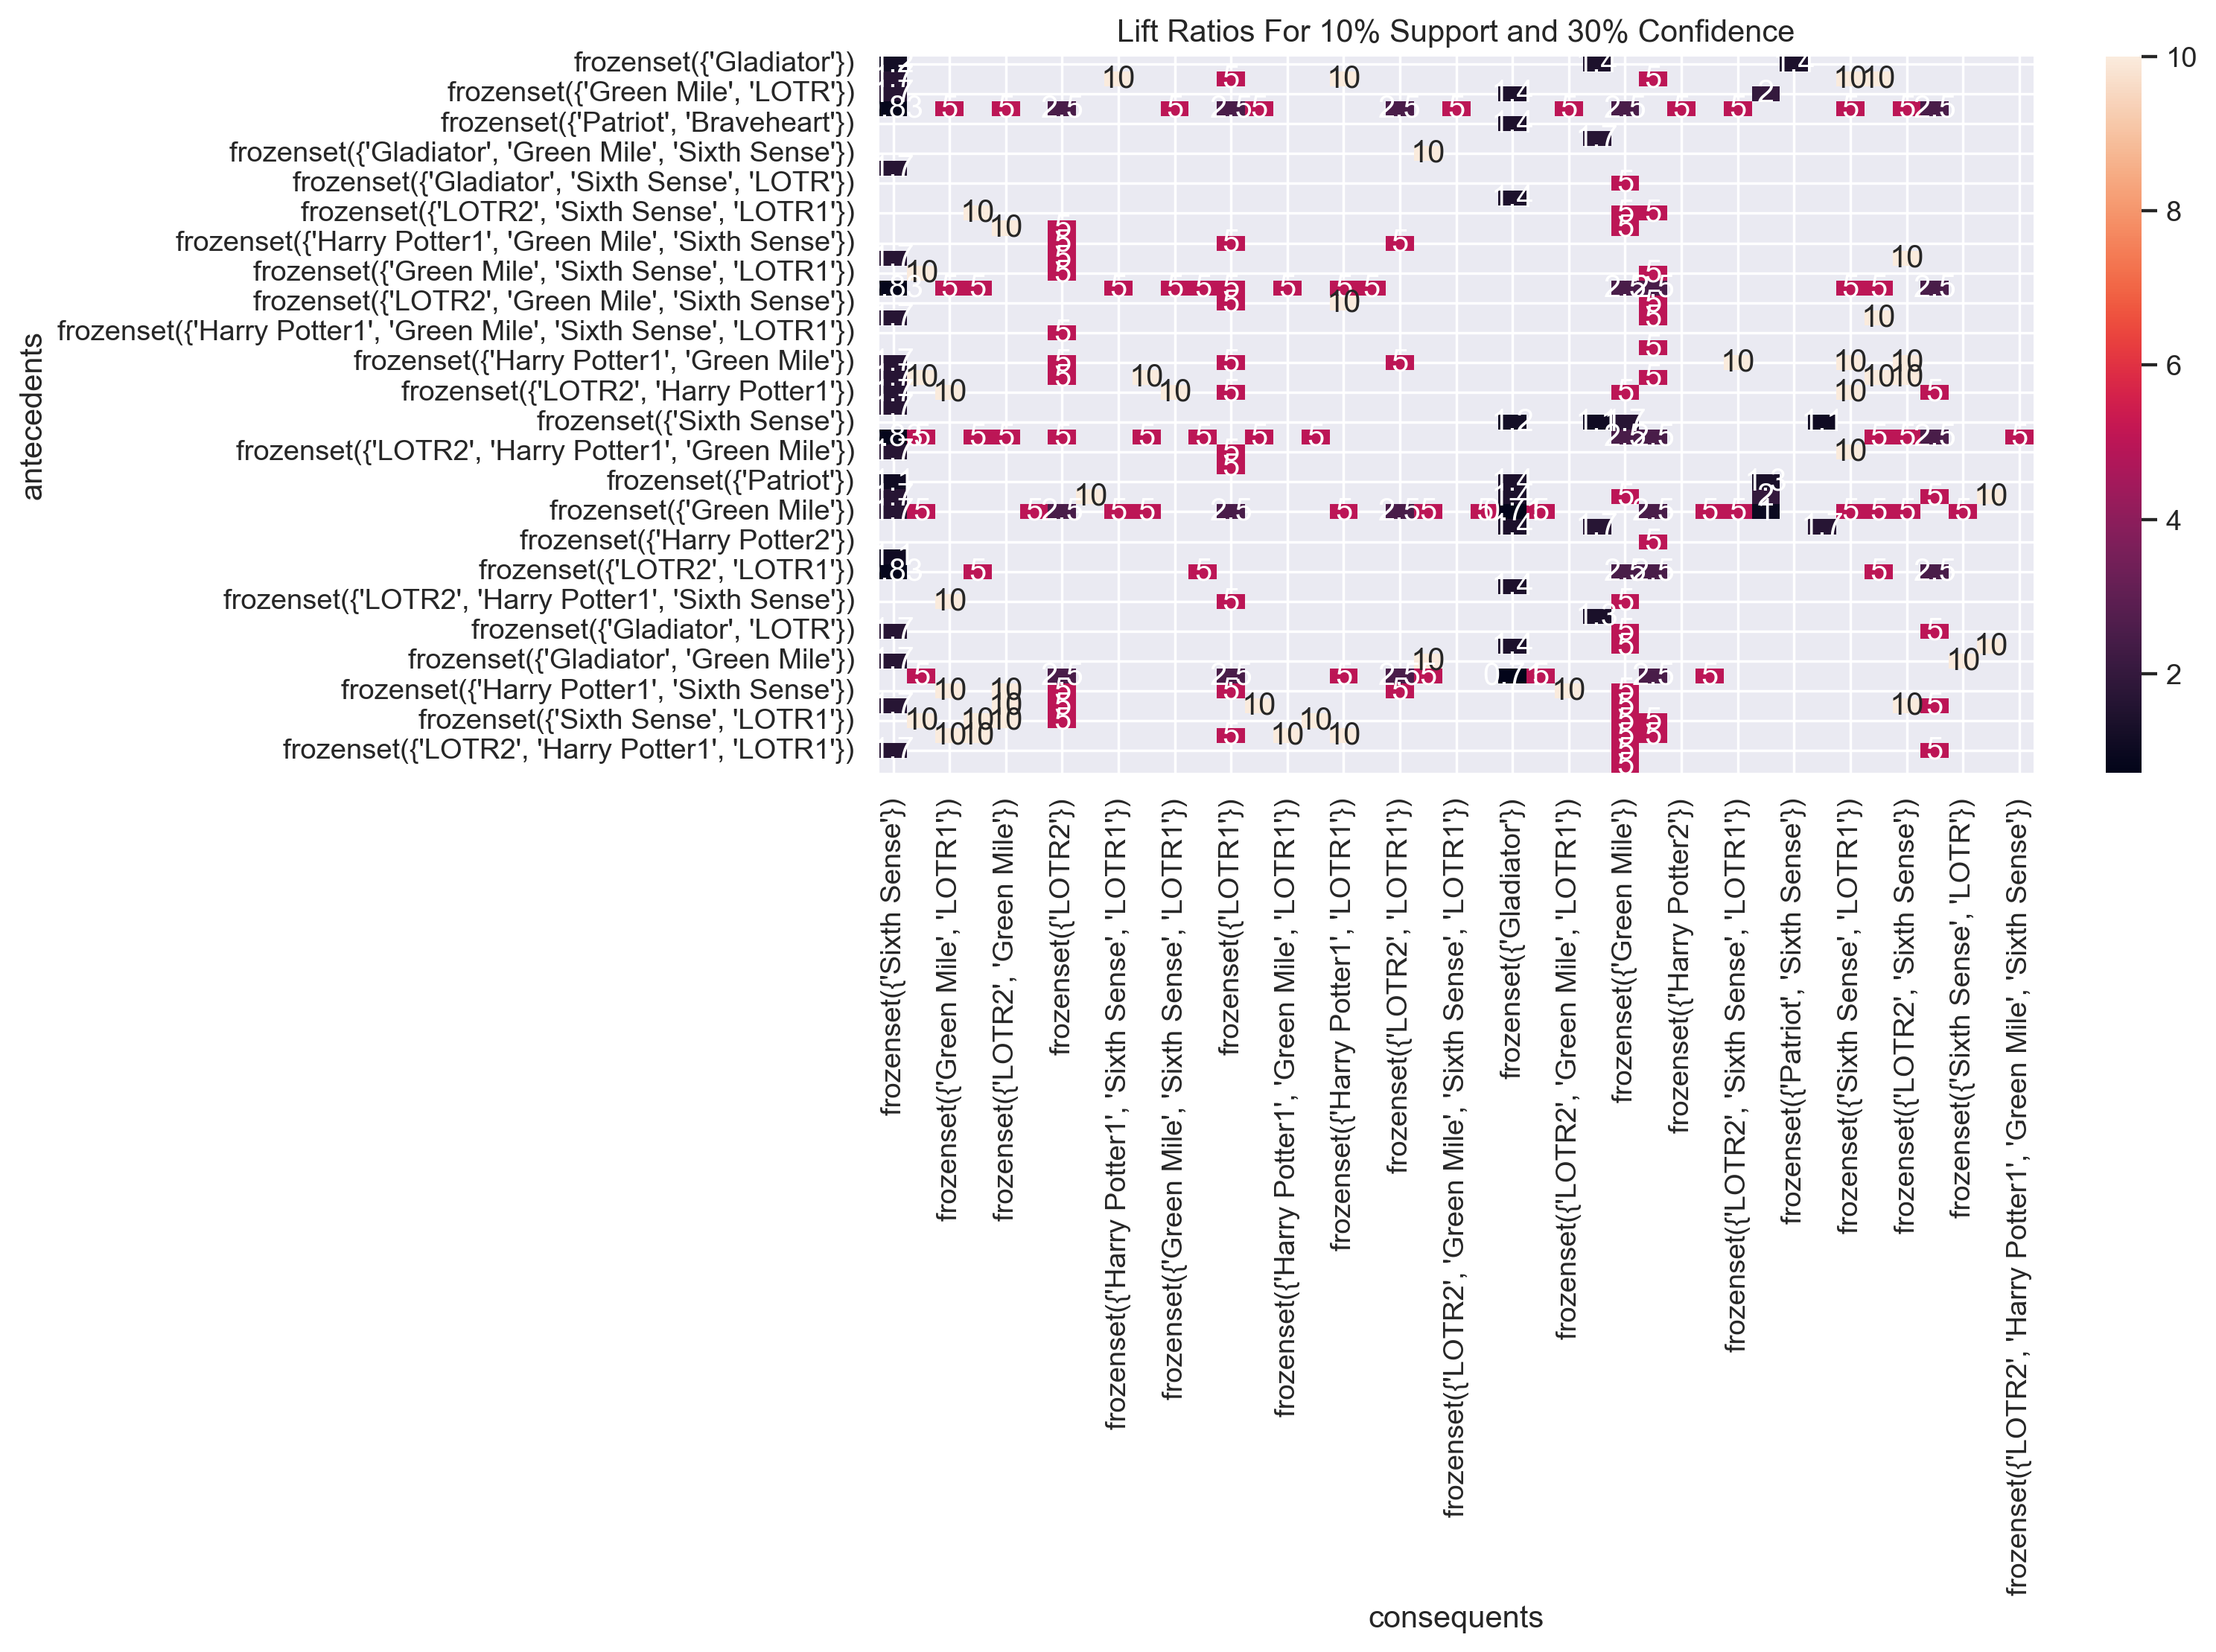

In [27]:
matrix_4 = model_4.pivot('antecedents','consequents','lift')
sns.heatmap(matrix_4,annot=True)
plt.title('Lift Ratios For 10% Support and 30% Confidence')

> * #### With low level of support and confidence we get 217 association rules.
> * #### 42 of them have lift ratio 10. Lot of them have confidence value 1 and conviction rate is infinity.
> * #### Still For such a small data we not prefer such large number of association rules.
> * #### Let's try to find moderate number of association rules with increasing support and confidence value accordingly.

____

### <font color = 'green'> 5. ASSOCIATION RULE FOR 20% SUPPORT VALUE AND 60% CONFIDENCE 

In [28]:
score_5 = apriori(df, min_support = 0.2, use_colnames = True)
score_5

support                           itemsets
0       0.6                      (Sixth Sense)
1       0.7                        (Gladiator)
2       0.2                            (LOTR1)
3       0.2                    (Harry Potter1)
4       0.6                          (Patriot)
5       0.2                            (LOTR2)
6       0.2                       (Green Mile)
7       0.5           (Gladiator, Sixth Sense)
8       0.4             (Patriot, Sixth Sense)
9       0.2          (Green Mile, Sixth Sense)
10      0.6               (Patriot, Gladiator)
11      0.2                     (LOTR2, LOTR1)
12      0.4  (Patriot, Gladiator, Sixth Sense)

In [29]:
model_5 = association_rules(score_5, metric = 'confidence', min_threshold = 0.6)
model_5

antecedents               consequents  antecedent support  \
0                (Gladiator)             (Sixth Sense)                 0.7   
1              (Sixth Sense)               (Gladiator)                 0.6   
2                  (Patriot)             (Sixth Sense)                 0.6   
3              (Sixth Sense)                 (Patriot)                 0.6   
4               (Green Mile)             (Sixth Sense)                 0.2   
5                  (Patriot)               (Gladiator)                 0.6   
6                (Gladiator)                 (Patriot)                 0.7   
7                    (LOTR2)                   (LOTR1)                 0.2   
8                    (LOTR1)                   (LOTR2)                 0.2   
9       (Patriot, Gladiator)             (Sixth Sense)                 0.6   
10    (Patriot, Sixth Sense)               (Gladiator)                 0.4   
11  (Gladiator, Sixth Sense)                 (Patriot)                 0.5   
12                 (Patriot)  (Gladiator, Sixth Sense)                 0.6   
13             (Sixth Sense)      (Patriot, Gladiator)                 0.6   

    consequent support  support  confidence      lift  leverage  conviction  \
0                  0.6      0.5    0.714286  1.190476      0.08         1.4   
1                  0.7      0.5    0.833333  1.190476      0.08         1.8   
2                  0.6      0.4    0.666667  1.111111      0.04         1.2   
3                  0.6      0.4    0.666667  1.111111      0.04         1.2   
4                  0.6      0.2    1.000000  1.666667      0.08         inf   
5                  0.7      0.6    1.000000  1.428571      0.18         inf   
6                  0.6      0.6    0.857143  1.428571      0.18         2.8   
7                  0.2      0.2    1.000000  5.000000      0.16         inf   
8                  0.2      0.2    1.000000  5.000000      0.16         inf   
9                  0.6      0.4    0.666667  1.111111      0.04         1.2   
10                 0.7      0.4    1.000000  1.428571      0.12         inf   
11                 0.6      0.4    0.800000  1.333333      0.10         2.0   
12                 0.5      0.4    0.666667  1.333333      0.10         1.5   
13                 0.6      0.4    0.666667  1.111111      0.04         1.2   

    zhangs_metric  
0        0.533333  
1        0.400000  
2        0.250000  
3        0.250000  
4        0.500000  
5        0.750000  
6        1.000000  
7        1.000000  
8        1.000000  
9        0.250000  
10       0.500000  
11       0.500000  
12       0.625000  
13       0.250000

* #### <font color ='red'><span style='background:yellow'> VISUALISATION: SCATTER PLOT </span>

In [30]:
pe.scatter_3d(data_frame= model_5, x = 'confidence', y = 'support', z = 'lift')

* #### <font color ='red'><span style='background:yellow'> VISUALISATION: HEATMAP </span>

Text(0.5, 1.0, 'Lift Ratios For 20% Support and 60% Confidence')

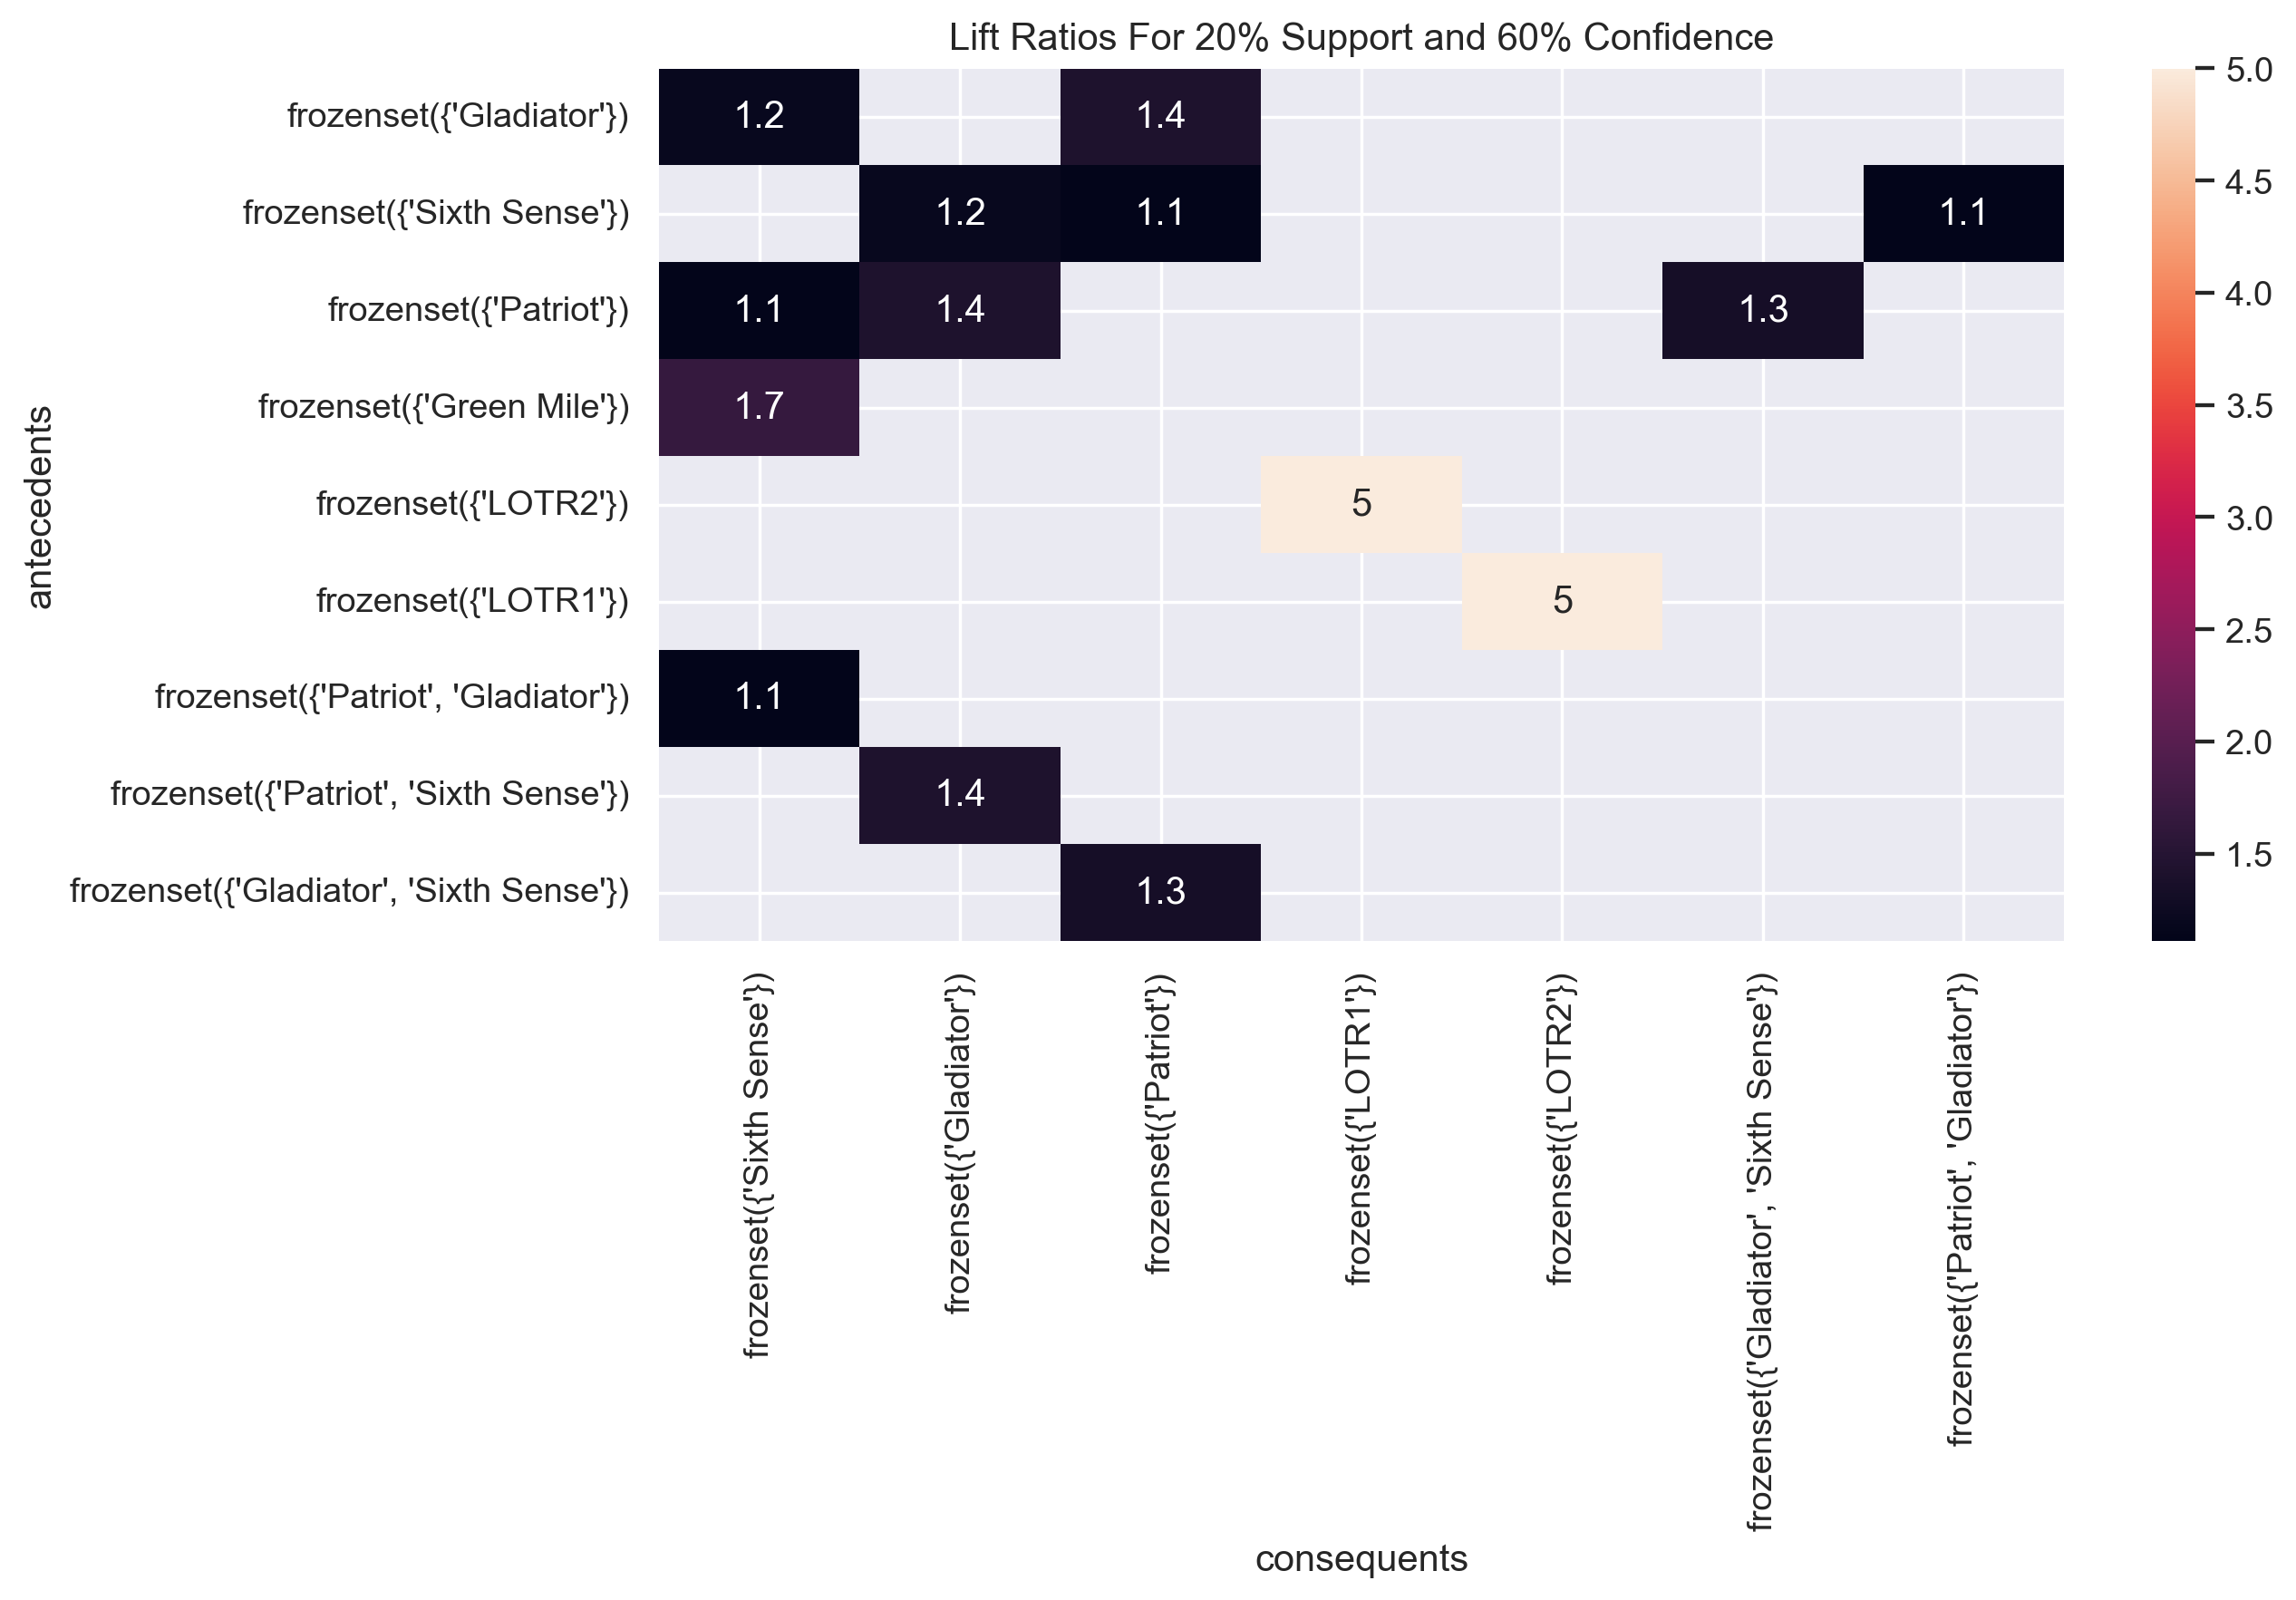

In [31]:
matrix_5 = model_5.pivot('antecedents','consequents','lift')
sns.heatmap(matrix_5,annot=True)
plt.title('Lift Ratios For 20% Support and 60% Confidence')

> * #### As we see in Heatmap we got 14 association rules with more than 1 lift ratio for all.
> * #### (LOTR1)-(LOTR2) have lift ratio 5, support value 0.2, confidence 1, leverage ratio 0.16 and conviction ratio infinity. This indicates (LOTR1) and (LOTR2) are sequel movies which movie watchers like to watch one after another or we can say one movie boost the selling of another.

___

* ### <font color = 'blue'> <u> CONCLUSION </u>
    + #### We seen from above different combinations of support and confidence values as we reduce threshold values we get increased lengths of associations.
    + #### As we have small data we will prefer to have moderate number of associations for that we choose 20% support and 60% association value.
    + #### These associations rules are applied to make promotions of movies to targeted customers. 
    + #### Also for OTT platform to advertise or to give discounted price or to make packages.
    

<br>
<br>
<br>


> # <font color = 'magenta'><u>END</u>


___